[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\rafab\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\rafab\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\rafab\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
C:\Users\rafab\AppData\Local\Temp\ipykernel_23356\2932886738.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_data['Processed_Text'] = cleaned_data['Topic'].astype(str) + ' ' + cleaned_data['Comment'].astype(str)
C:\Users\rafab\AppData\Local\Temp\ipykernel_233

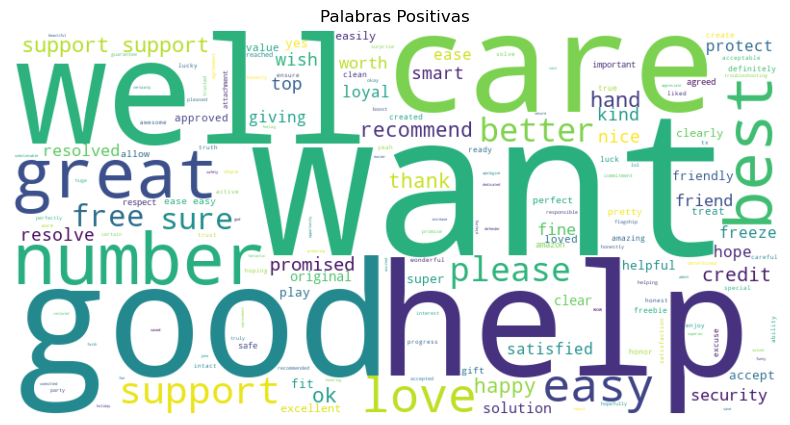

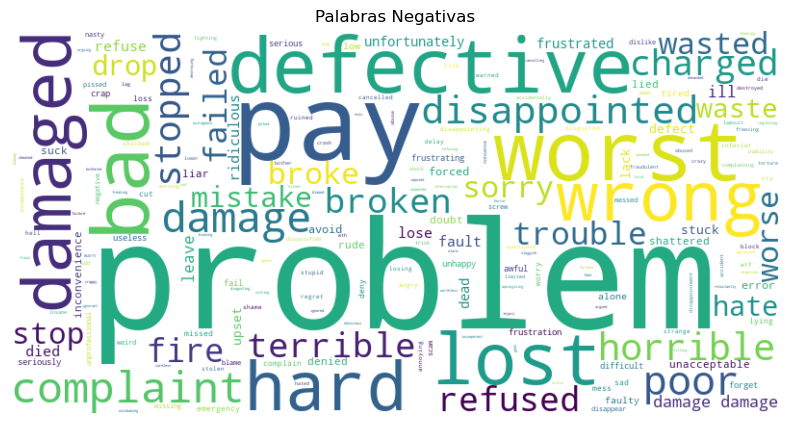

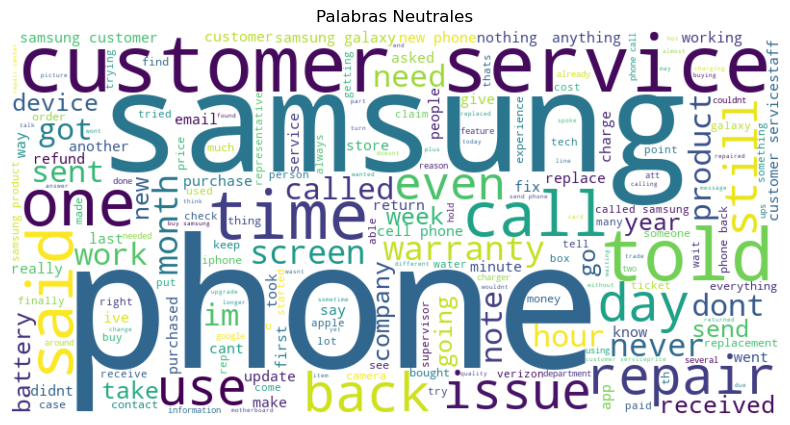

In [1]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import re
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Descargar recursos de nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('vader_lexicon')

# Instanciar lematizador y analizador de sentimientos
lemmatizer = WordNetLemmatizer()
analyzer = SentimentIntensityAnalyzer()

# Definir stopwords en inglés
stop_words = set(stopwords.words('english'))

# Función para preprocesar el texto
def preprocess_text(text):
    # Convertir a minúsculas
    text = text.lower()
    
    # Eliminar signos de puntuación y caracteres no alfabéticos
    text = re.sub(r'[^a-z\s]', '', text)
    
    # Tokenizar y eliminar stopwords, y lematizar
    words = text.split()
    words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]
    
    return ' '.join(words)

# Cargar el archivo CSV
file_path = 'Data/review-samsung Consumer Affairs.csv'
data = pd.read_csv(file_path)

# Eliminar filas con valores nulos en las columnas 'Title' y 'Text'
cleaned_data = data.dropna(subset=['Topic', 'Comment'])

# Aplicar preprocesamiento al texto combinado
cleaned_data['Processed_Text'] = cleaned_data['Topic'].astype(str) + ' ' + cleaned_data['Comment'].astype(str)
cleaned_data['Processed_Text'] = cleaned_data['Processed_Text'].apply(preprocess_text)

# Función para clasificar el sentimiento de las palabras
def sentiment_analysis(text):
    pos_words = []
    neg_words = []
    neu_words = []
    
    words = text.split()
    for word in words:
        score = analyzer.polarity_scores(word)
        if score['compound'] >= 0.05:
            pos_words.append(word)
        elif score['compound'] <= -0.05:
            neg_words.append(word)
        else:
            neu_words.append(word)
    
    return pos_words, neg_words, neu_words

# Aplicar análisis de sentimiento al texto preprocesado
combined_text = ' '.join(cleaned_data['Processed_Text'])
pos_words, neg_words, neu_words = sentiment_analysis(combined_text)

# Función para generar y mostrar nubes de palabras
def generate_wordcloud(words, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(words))
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title)
    plt.axis('off')
    plt.show()

# Nube de palabras positivas
generate_wordcloud(pos_words, 'Palabras Positivas')

# Nube de palabras negativas
generate_wordcloud(neg_words, 'Palabras Negativas')

# Nube de palabras neutrales
generate_wordcloud(neu_words, 'Palabras Neutrales')


In [2]:
# Modificar la función para devolver una etiqueta de sentimiento general
def sentiment_label(text):
    score = analyzer.polarity_scores(text)
    if score['compound'] >= 0.05:
        return 'Positive'
    elif score['compound'] <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

# Aplicar la función a la columna 'Processed_Text' para obtener la etiqueta de sentimiento
cleaned_data['Sentiment'] = cleaned_data['Processed_Text'].apply(sentiment_label)
cleaned_data

C:\Users\rafab\AppData\Local\Temp\ipykernel_23356\4149664210.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_data['Sentiment'] = cleaned_data['Processed_Text'].apply(sentiment_label)


,Rating,Topic,Location,Name,Comment,Date,Processed_Text,Sentiment
0,1,Customer Service,Other,Rkzala,I purchased a Samsung Galaxy M52 which develop...,"Reviewed June 17, 2024",customer service purchased samsung galaxy deve...,Neutral
1,1,"Customer Service,Staff","Wellesley Hills, MA",Jan,I owned a Samsung cellphone for over 15+ years...,"Reviewed May 14, 2024",customer servicestaff owned samsung cellphone ...,Positive
2,2,"Customer Service,Price","Spanaway, WA",Cortland,I want to start with stating that I work indus...,"Reviewed April 4, 2024",customer serviceprice want start stating work ...,Positive
4,1,"Customer Service,Staff","Denver, CO",A.,What is going on with Samsung? This used to be...,"Reviewed Dec. 16, 2023",customer servicestaff going samsung used compa...,Positive
5,1,Customer Service,"Philadelphia, PA",Andrew,My phone have been broken for almost 2 months ...,"Reviewed Oct. 29, 2023",customer service phone broken almost month sam...,Positive
...,...,...,...,...,...,...,...,...
634,1,"Customer Service,Staff","Lakeland, FL",Leslie,My experience with Samsung repair center in Te...,"Reviewed June 21, 2016",customer servicestaff experience samsung repai...,Negative
635,1,"Customer Service,Staff","Westfield, IN",Tyler,I purchased a Samsung Galaxy S6 Edge back in N...,"Reviewed June 18, 2016",customer servicestaff purchased samsung galaxy...,Positive
636,1,Customer Service,"New Straitsville, OH",Chris,I purchased a new Samsung Galaxy S7 from Best ...,"Reviewed June 13, 2016",customer service purchased new samsung galaxy ...,Neutral
637,1,"Customer Service,Coverage,Price,Staff","Cape Town, Other",Jenny,At 5 o'clock 30 May 2016 I took my Samsung S4 ...,"Reviewed June 1, 2016",customer servicecoveragepricestaff oclock may ...,Negative


In [3]:
def calculate_nps(cleaned_data):
    promoters = cleaned_data[cleaned_data['Rating'] >= 4].shape[0]
    detractors = cleaned_data[cleaned_data['Rating'] <= 2].shape[0]
    passives = cleaned_data[cleaned_data['Rating'] == 3].shape[0]
    total_respondents = cleaned_data.shape[0]
    nps = ((promoters - detractors) / total_respondents) * 100
    return nps, promoters, passives, detractors

nps, promoters, passives, detractors = calculate_nps(cleaned_data)
print(f'Net Promoter Score (NPS): {nps}')

Net Promoter Score (NPS): -34.34959349593496


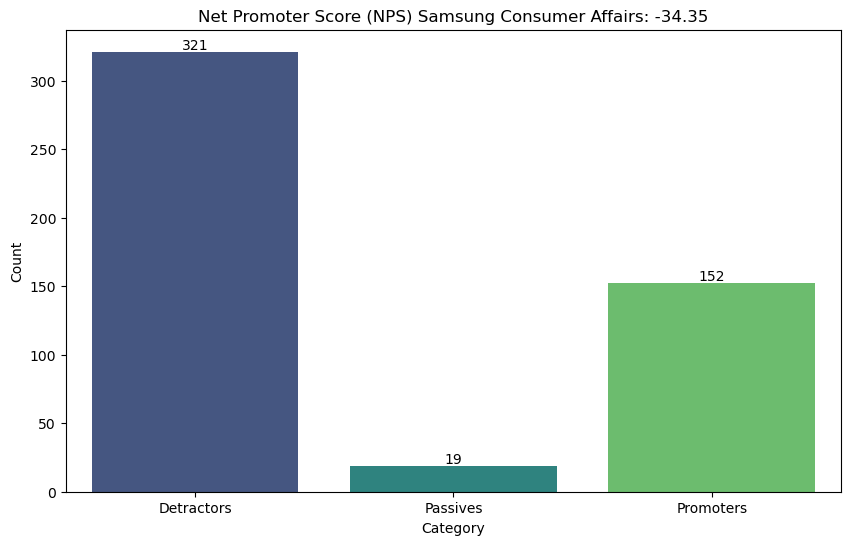

In [9]:
import seaborn as sns
# Datos para la visualización
nps_data = pd.DataFrame({
    'Category': ['Detractors', 'Passives', 'Promoters'],
    'Count': [detractors, passives, promoters]
})

# Crear el gráfico de barras para NPS
plt.figure(figsize=(10, 6))
sns.barplot(x='Category', y='Count', data=nps_data, palette='viridis')
plt.title(f'Net Promoter Score (NPS) Samsung Consumer Affairs: {nps:.2f}')
plt.xlabel('Category')
plt.ylabel('Count')

# Añadir las etiquetas de los valores en las barras
for index, value in enumerate(nps_data['Count']):
    plt.text(index, value + 2, str(value), ha='center')

plt.show()

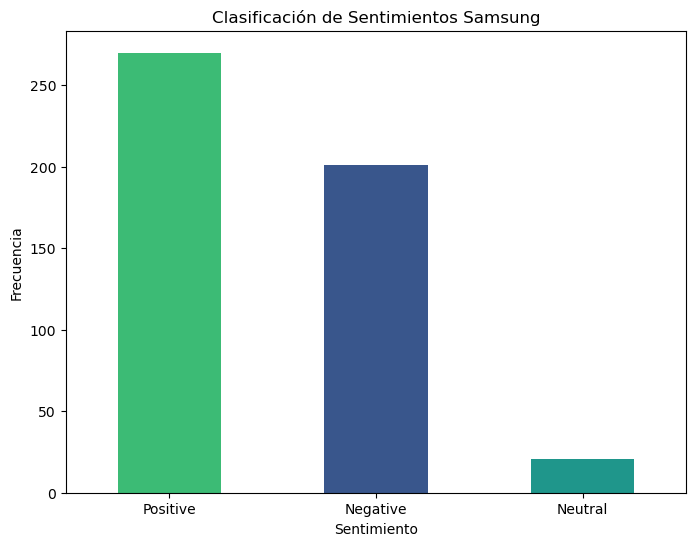

In [8]:
# Contar las ocurrencias de cada sentimiento
conteo_sentimientos = cleaned_data['Sentiment'].value_counts()

# Crear el gráfico de barras
plt.figure(figsize=(8, 6))
conteo_sentimientos.plot(kind='bar', color=['#3CBB75FF', '#39568CFF', '#1F968BFF'])

# Establecer títulos y etiquetas
plt.title('Clasificación de Sentimientos Samsung')
plt.xlabel('Sentimiento')
plt.ylabel('Frecuencia')
plt.xticks(rotation=0)  # Rotar las etiquetas del eje x para mejor visualización

# Mostrar la visualización
plt.show()


In [6]:
# Prepara los datos para el heatmap
df_topics = cleaned_data['Topic'].str.get_dummies(sep=',')
df_topics_sum = df_topics.sum().sort_values(ascending=False)

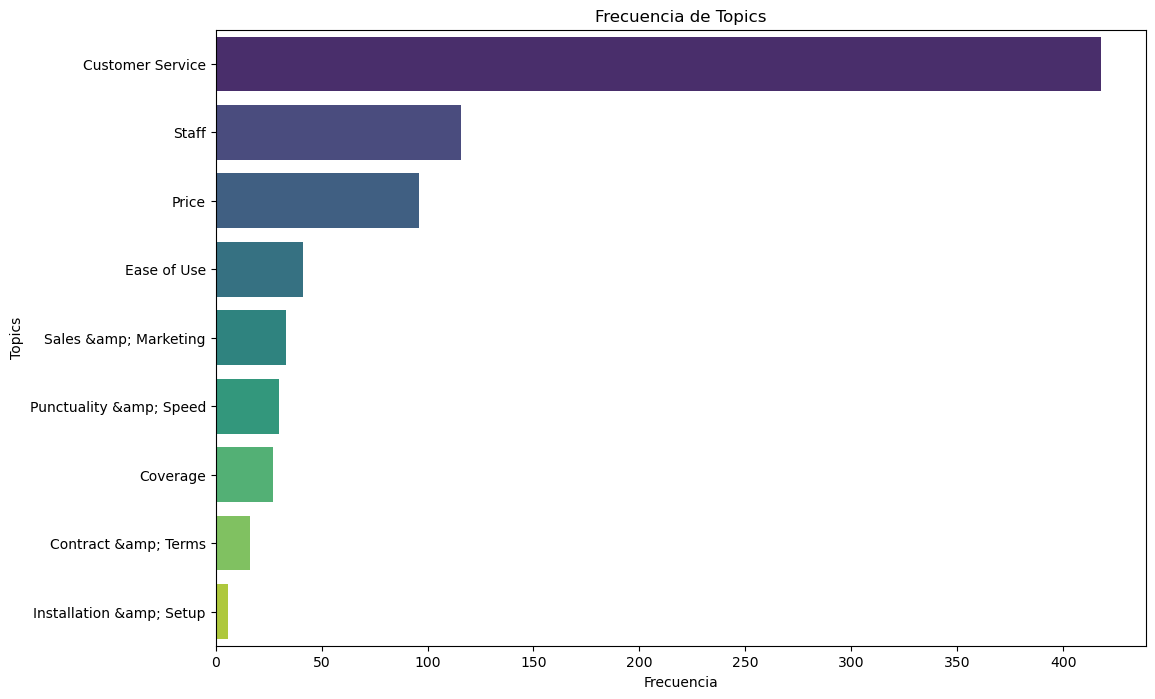

In [7]:
plt.figure(figsize=(12, 8))
sns.barplot(x=df_topics_sum.values, y=df_topics_sum.index, palette='viridis')
plt.title('Frecuencia de Topics')
plt.xlabel('Frecuencia')
plt.ylabel('Topics')
plt.show()